<a href="https://colab.research.google.com/github/MiguelStrelow/CNC/blob/main/Relat%C3%B3rio4_MigueldeTunesStrelow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [ ]:
import sympy as sp
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Definindo algumas utilidades e funções básicas



In [ ]:
def plotPontos(abs, ord):
  plt.plot(abs, ord)
  plt.xlabel('Eixo x')
  plt.ylabel('Eixo y')
  plt.grid(True, which='both')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.show()

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')

In [ ]:
def trap1(h, f0, f1):
  Trap = h * (f0 + f1)/2
  return Trap

In [ ]:
def simpson13(h, f0, f1, f2):

  simp =  h * (f0 + 4 * f1 + f2) / 3

  return simp

In [ ]:
def simpson38(h, f0, f1, f2, f3):

  simp = (3 * h * (f0 + 3 * (f1 + f2) + f3)) / 8

  return simp

In [ ]:
def constroi_mmq(coeficientes):
  i = len(coeficientes)

  pol = f"{coeficientes[i-1]:.6f}"

  for k in range(0, i-1):

    pol += f"+ {coeficientes[k]:.6f} * x ** {i-k-1}"



  pol1 = sp.parsing.sympy_parser.parse_expr(pol)

  print(f"O polinômio calculado é:\n", pol1)

  return pol1

In [ ]:
def plotar(f1, f2, f3, abscissas, ordenadas, titulo, limite1, limite2):
  aux = []
  inicio = limite1
  fim = limite2
  nro_de_pontos = 10000
  plt.axhline(y=0, color = "black", linestyle = '--')
  curva = np.linspace(inicio, fim, nro_de_pontos)

  f1 = sp.lambdify(x, f1, "numpy")
  f2 = sp.lambdify(x, f2, "numpy")
  f3 = sp.lambdify(x, f3, "numpy")

  valores = [f1(valor) for valor in curva]
  plt.plot(curva, valores, color = "black", linestyle='-')

  valores2 = [f2(valor2) for valor2 in curva]
  plt.plot(curva, valores2, color = "red",  linestyle='-')

  valores3 = [f3(valor3) for valor3 in curva]
  plt.plot(curva, valores3, color = "green",  linestyle='-')

  plt.scatter(abscissas, ordenadas)
  plt.title(titulo)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.grid()
  plt.show()


In [ ]:
def mmq(pontos, abscissas, ordenadas, grauPol):
  #Falta implementar a métrica
  sumx = 0
  sumxy = 0
  sumxsqry = 0
  sumxcby = 0
  st = 0
  sumy = 0
  sumxsqr = 0
  sumxcb = 0
  sumxfr = 0
  sumxqn = 0
  sumxsx = 0
  sr = 0

  for i in range(0, pontos):

    sumx += abscissas[i]
    sumy += ordenadas[i]
    sumxy += abscissas[i] * ordenadas[i]
    sumxsqr += abscissas[i] * abscissas[i]
    if grauPol >= 2:
      sumxcb += (abscissas[i] ** 3)
      sumxfr += (abscissas[i] ** 4)
      sumxsqry += (abscissas[i] * abscissas[i] * ordenadas[i])
      if grauPol >= 3:
        sumxqn += (abscissas[i] ** 5)
        sumxsx += (abscissas[i] ** 6)
        sumxcby += ((abscissas[i] ** 3) * ordenadas[i])

  mediax = sumx / pontos
  mediay = sumy / pontos

  if grauPol == 1:
    Matriz = [[sumxsqr, sumx], [sumx, pontos]]
    Vresults = [sumxy, sumy]
#|sumxsqr   sumx | * |a| = |sumxy|
#|sum x    pontos|   |b|   |sumy |


  else:
    if grauPol == 2:
      Matriz = [[sumxfr, sumxcb, sumxsqr], [sumxcb, sumxsqr, sumx], [sumxsqr, sumx, pontos]]
      Vresults = [sumxsqry, sumxy, sumy]
#|sumxfr  sumxcb  sumxsqr| * |a| = |sumxsqry|
#|sumxcb  sumxsqr  sumx  |   |b|   | sumxy  |
#|sumxsqr sumx    pontos |   |c|   |  sumy  |
    else:
      if grauPol == 3:
        Matriz = [[sumxsx, sumxqn, sumxfr, sumxcb],[sumxqn, sumxfr, sumxcb, sumxsqr], [sumxfr, sumxcb, sumxsqr, sumx], [sumxcb, sumxsqr, sumx, pontos]]
        Vresults = [sumxcby, sumxsqry, sumxy, sumy]

#|sumxsx  sumxqn  sumxfr  sumxcb |   |a|   |sumxcby |
#|sumxqn  sumxfr  sumxcb  sumxsqr|   |b| = |sumxsqry|
#|sumxfr  sumxcb  sumxsqr sumx   |   |c|   | sumxy  |
#|sumxcb  sumxsqr  sumx   pontos |   |d|   |  sumy  |

  a = gauss(Matriz, Vresults, grauPol+1)

  return a



In [ ]:
def gauss(A, b, n):
  for j in range(0, n):
    if abs(A[j][j] != 0):
      r = 1/A[j][j]

      for i in range(j+1, n):
        mult = A[i][j]*r
        A[i][j] = 0
        for k in range(j+1, n):
          A[i][k] = A[i][k] - mult*A[j][k]

        b[i] = b[i] - mult*b[j]

  res = np.linalg.solve(A, b)
  return np.ndarray.tolist(res)

#Integração


##Método do trapézio repetido

In [ ]:
def trapezio(a, b, n, f, erromax):
  f1 = sp.lambdify(x, f, "numpy")
  h = (b - a) / n
  sum = 0
  for i in range(0, n):
    x1 = a + i * h
    x2 = a + (i + 1) * h
    sum += trap1(h, f1(x1), f1(x2))


  Simp = sum
  derivada2 = sp.diff(f, x, 2)
  derivada2 = sp.lambdify(x, derivada2, "numpy")

  erro = (-n * h ** 3)/12 * derivada2(b)
  if abs(erro) <= erromax:
    return Simp, erro
  else:
    print("Erro acima do limite estabelecido, tente aumentar o número de subdivisões")
    return

###Método dos trapézios caso sejam dados os pontos, e não a função

In [ ]:
def trapeziopontos(a, b, n, ord):
  h = (b - a) / n
  sum = 0
  for i in range(0, n):
    sum += trap1(h, ord[i], ord[i+1])

  Simp = sum

  return Simp

##1/3 de Simpson repetido

In [ ]:
def simpson13r(a, b, n, f):
  f = sp.lambdify(x, f)
  h = (b - a) / n
  sum = 0
  for i in range(0, n, 2):
    sum += simpson13(h, f(a + i * h), f(a + (i + 1) * h), f(a + (i + 2) * h))

  Simp = sum

  return Simp

In [ ]:
def simpson13pontosr(a, b, n, abs):
  h = (b - a) / n
  sum = 0
  for i in range(0, n, 2):
    sum += simpson13(h, abs[i], abs[i+1], abs[i+2])

  Simp = sum

  return Simp

##3/8 de Simpson repetido

In [ ]:
def simpson38r(a, b, n, f):
  h = (b - a) / n
  sum = simpson38(h, f(a), f(a + h), f(a + 2 * h), f(a + 3 * h))
  for i in range(2, n-1, 3):
    sum += simpson38(h, f(a + (i+1) * h), f(a + (i+2) * h), f(a + (i+3) * h), f(a + (i+4) * h))

  Simp = sum

  return Simp

In [ ]:
def simpson38pontosr(a, b, n, abs):
  h = (b - a) / n
  sum = simpson38(h, abs[0], abs[1], abs[2], abs[3])
  for i in range(3, n, 3):
    sum += simpson38(h, abs[i], abs[i+1], abs[i+2], abs[i+3])

  Simp = sum

  return Simp

#Função que estava junto com as outras de Simpson então implementei mas não funciona
Aí como não era necessário resolvi deixar comentada

In [ ]:
"""def SimpInt(a, b, n, f):
  f = sp.lambdify(x, f, "numpy")
  h = (b-a)/n
  sum = 0
  if n == 1:
    sum = trap1(h, f(a), f(b))
  else:
    m = n
    impar = n/2 - mt.floor(n/2)

    if impar > 0 and n > 1:
      sum += simpson38(h, n - 3, f)
      m = n - 3

    if m > 1:
      sum += simpson13(a, b, m, f)

  return sum"""

'def SimpInt(a, b, n, f):\n  f = sp.lambdify(x, f, "numpy")\n  h = (b-a)/n\n  sum = 0\n  if n == 1:\n    sum = trap1(h, f(a), f(b))\n  else:\n    m = n\n    impar = n/2 - mt.floor(n/2)\n\n    if impar > 0 and n > 1:\n      sum += simpson38(h, n - 3, f)\n      m = n - 3\n\n    if m > 1:\n      sum += simpson13(a, b, m, f)\n\n  return sum'

#Derivação

##Método de Euler

In [ ]:
def euler(a, b, y0, m, f):
  f = sp.lambdify([x, y], f, "numpy")
  h = (b - a) / m
  vetX = [0 for _ in range(m+1)]
  vetY = [0 for _ in range(m+1)]
  abs = a
  ord = y0
  vetX[0] = abs
  vetY[0] = ord
  fxy = f(abs,ord)
  for i in range(m+1):
    abs = a + i * h
    ord += h * fxy
    fxy = f(abs, ord)
    vetX[i] = abs
    vetY[i] = ord

  return vetX, vetY

##Método de Runge-Kutta de grau 2

In [ ]:
def RK2(a, b, y0, h, m, f):
  f = sp.lambdify([x, y], f, "numpy")
  xt = a
  yt = y0
  vetX = [0 for _ in range(m+1)]
  vetY = [0 for _ in range(m+1)]
  vetX[0] = xt
  vetY[0] = yt
  for i in range(1, m+1):

    k1 = h * f(vetX[i-1], vetY[i-1])

    abs = vetX[i - 1] + h
    ord = vetY[i - 1] + k1
    k2 = h * f(abs, ord)

    yt +=  (k1 + k2)/2

    vetX[i] = abs
    vetY[i] = yt

  return vetX, vetY

##Método de Runge-Kutta de grau 4 (Não precisava tbm mas tava no e-aula então eu fiz)(Não sei se está funcionando)

In [ ]:
def RK4(a, b, y0, m):
  h = (b - a) / m
  xt = a
  yt = y0
  vetX[0] = xt
  vetY[0] = yt
  for i in range(m):
    abs = xt
    ord = yt
    k1 = f(abs, ord)

    abs = xt + h / 2
    ord = yt + h / 2 * k1
    k2 = f(abs, ord)

    ord = yt + h / 2 * k2
    k3 = f(abs, ord)

    abs = xt + h
    ord = yt + h * k3
    k4 = f(abs, ord)

    xt = a + i * h
    yt += h/6 * (k1 + 2 * (k2 + k3) + k4)

    vetX[i] = xt
    vetY[i] = yt

  return vetX, vetY

#Testes

In [ ]:
#f = 2/(x**2 + 4)
#trapezio(0, 2, 6, f)

In [ ]:
f = x**2
simpson13r(0, 10, 8, f)

333.33333333333337

In [ ]:
f = sp.lambdify(x, x**2)
simpson38r(0, 10, 21, f)

333.33333333333326

In [ ]:
f = y*x
euler(0, 1, 1, 10, f)

([0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 [1.0,
  1.0,
  1.01,
  1.0302,
  1.061106,
  1.1035502400000001,
  1.158727752,
  1.22825141712,
  1.3142290163184,
  1.419367337623872,
  1.5471103980100205])

In [ ]:
f = -x*y
RK2(0, 1, 1, 0.1, 10, f)

([0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  0.9999999999999999],
 [1,
  0.995,
  0.9801745,
  0.95596418985,
  0.92307902171916,
  0.882463544763517,
  0.8352517451186688,
  0.7827144103507045,
  0.7262024299233837,
  0.6670895521276202,
  0.6067179476600706])

#Relatório 4

##1)
Uma corrida tem duas fases distintas: na primeira, a fase mais curta, o
movimento do carro é perfeitamente não determinístico, dependendo das
derrapagens e da forma como o condutor consegue dominar o carro. Na segunda
fase, o carro tem um movimento muito rápido, cuja aceleração está
perfeitamente definida.
Considere a prova do condutor X de duração 7,5 s. Na primeira fase os valores
da aceleração em cada instante encontram-se na tabela abaixo.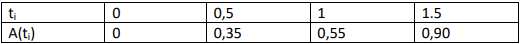

Na segunda fase da corrida a aceleração é definida pela seguinte expressão:

    a(t) = 0,5t^2 -0,15t para t ∈ [1,5; 7,5]


###a) Estime a velocidade na primeira fase da corrida, utilizando a fórmula da integração mais adequada.

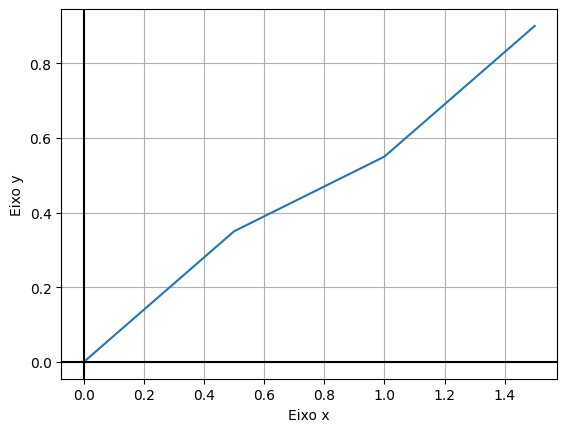

In [ ]:
#Primeiro, analisar o gráfico
t = [0, 0.5, 1, 1.5]
A = [0, 0.35, 0.55, 0.9]
plotPontos(t, A)

In [ ]:
#Olhando para o gráfico, notamos a formação de 3 trapézios. Acredito, com base nisso, que os método dos trapézios seja o mais indicado.
vm = trapeziopontos(0, 1.5, 3, A)
print("A velocidade média na primeira fase é:", vm, "U.V.")
#Como a quantidade de subdivisões é impar, só podemos usar o método 3/8 de simpson
vm = simpson38pontosr(0, 1.5, 3, A)
print("A velocidade média na primeira fase é:", vm, "U.V.")
print("O valor é igual para ambos os métodos.")

A velocidade média na primeira fase é: 0.675 U.V.
A velocidade média na primeira fase é: 0.675 U.V.
O valor é igual para ambos os métodos.


###b) Estime a velocidade na segunda fase da corrida, utilizando a fórmula repetida do Trapézio com erro de truncamento em valor absoluto inferior a 0,3.

In [ ]:
f = 0.5 * x ** 2 - 0.15 * x
vm = trapezio(1.5, 7.5, 6, f, 0.3)

Erro acima do limite estabelecido, tente aumentar o número de subdivisões


In [ ]:
#Aumentando o número
vm, erro = trapezio(1.5, 7.5, 8, f, 0.3)
print("A velocidade na segunda etapa da corrida é de, aproximadamente, ", vm ,"U.V. com um erro de aproximadamente +-", abs(erro), "U.V.")

A velocidade na segunda etapa da corrida é de, aproximadamente,  65.98125 U.V. com um erro de aproximadamente +- 0.28125 U.V.


In [ ]:
#8 parece ser o número mínimo de subdivisões necessárias. Tentarei com valores maiores apenas para ver qual o menor erro que posso conseguir
#Isso vai ficar comentado pra não atrapalhar o tempo de execução do trabalho
#Depois vou fazer isso em C pra rodar mais rápido
#Mentira
#vm = trapezio(1.5, 7.5, 100000000, f, 0.3)
#print(vm)

##2)
A disciplina de Cálculo Numérico Computacional de um curso de Computação no
ano letivo 2022/2 teve 92 alunos inscritos. Inicialmente, um grupo de 10 alunos
resolveu lançar o boato de que o exame iria ser cancelado.
Em média cada estudante conversa com outros colegas a uma taxa de 2
estudantes/hora, podendo estes já saberem ou não da novidade. Se y
representar o número de estudantes que sabem do boato no instante de tempo
t (horas) então a taxa de recepção do boato é dada por:

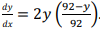

Utilizando o método mais adequado que estudou, calcule o número de
estudantes que após 3 horas tomou conhecimento do boato (use h = 1).

In [ ]:
f = (2*y*(92-y)/92)

r1, r2 = RK2(0, 3, 10, 1, 3, f)

print("Após 3 horas,", sp.floor(r2[3]), "estudantes conheciam o boato")

Após 3 horas, 73 estudantes conheciam o boato


##3)
A coleta de dados sobre a temperatura em relação à posição para alguns corpos
de prova, apresentaram os seguintes cenários:

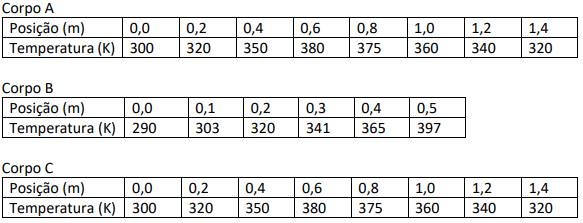

Obtenha a temperatura média para cada um dos corpos. Para a integração
numérica, utilize as regras do Trapézio e de 1/3 de Simpson.




In [ ]:
#A temperatura média é obtida dividindo o resultado da integral definida pelo comprimento do intervalo
mA = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
TA = [300, 320, 350, 380, 375, 360, 340, 320]

mB = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
TB = [290, 303, 320, 341, 365, 397]

mC = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
TC = [300, 320, 350, 380, 375, 360, 340, 320]


tpa = trapeziopontos(0, 1.4, 7, TA)
#Para 1/3 de simpson, precisamos de um número par de subdivisões. Para tal, desprezaremos o último valor fornecido
spa = simpson13pontosr(0, 1.2, 6, TA)
print("A temperatura média do corpo A é, por trapézio:", tpa/1.4)
print("Por Simpson:", spa/1.2)

tpb = trapeziopontos(0, 0.5, 5, TB)
#Mesma lógica que anterior
spb = simpson13pontosr(0, 0.4, 4, TB)
print("A temperatura média do corpo B é, por trapézio:", tpb/0.5)
print("Por Simpson:", spb/0.4)


tpc = trapeziopontos(0, 1.4, 7, TC)
spc = simpson13pontosr(0, 1.2, 6, TC)
print("A temperatura média do corpo C é, por trapézio:", tpa/1.4)
print("Por Simpson:", spc/1.2)


A temperatura média do corpo A é, por trapézio: 347.8571428571429
Por Simpson: 351.6666666666667
A temperatura média do corpo B é, por trapézio: 334.5
Por Simpson: 322.5833333333333
A temperatura média do corpo C é, por trapézio: 347.8571428571429
Por Simpson: 351.6666666666667


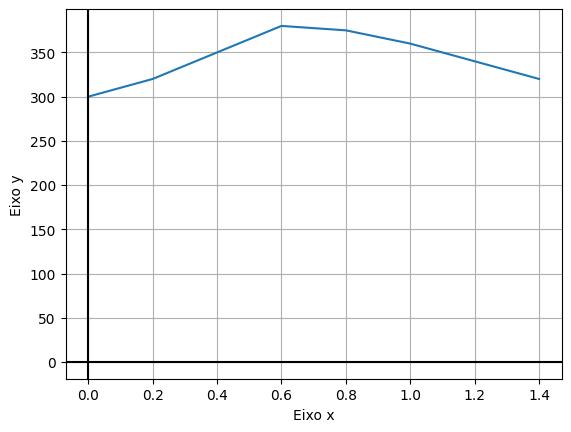

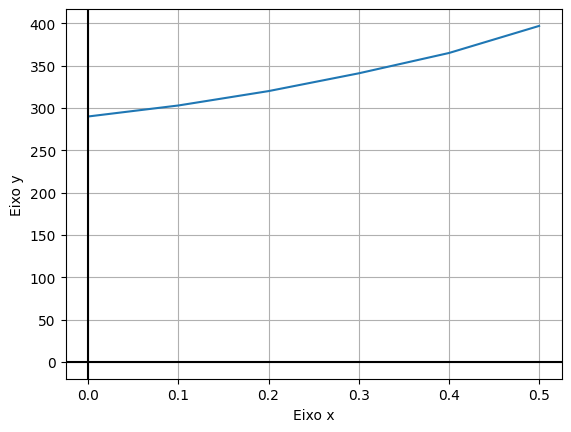

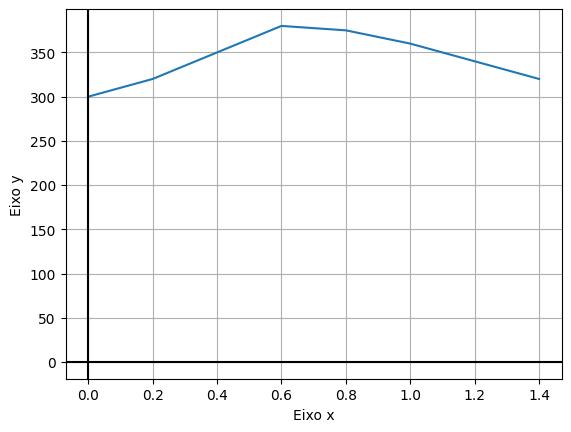

In [ ]:
plotPontos(mA, TA)
plotPontos(mB, TB)
plotPontos(mC, TC)

##4)
Acompanhando-se a trajetória de algumas partículas, obtiveram-se os seguintes
resultados em função do tempo:
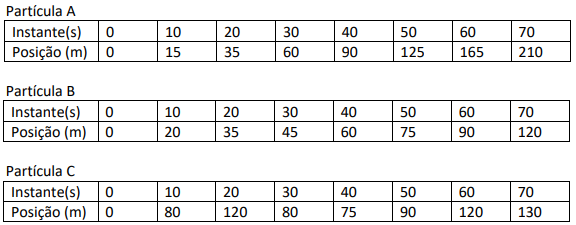

Obtenha estimativas para a velocidade e a aceleração de cada partícula para
cada instante de tempo. Utilize expressões para as derivadas numéricas de
primeira ordem.

In [ ]:
#Como o método de Euler requer uma função, pegarei emprestado um polinômio interpolador do relatório passado
at = [0, 10, 20, 30, 40, 50, 60, 70]
am = [0, 15, 35, 60, 90, 125, 165, 210]
bt = [0, 10, 20, 30, 40, 50, 60, 70]
bm = [0, 20, 35, 45, 60, 75, 90, 120]
ct = [0, 10, 20, 30, 40, 50, 60, 70]
cm = [0, 80, 120, 80, 75, 90, 120, 130]
#Primeiro, construo o polinômio aproximativo, em seguida, derivo por euler
af = constroi_mmq(mmq(8, at, am, 3))
ax, ay = euler(0, 70, 0, 7, af)
print("As estimativas da velocidade da particula a são:", ay)#Tudo errado
bf = constroi_mmq(mmq(8, bt, bm, 3))
bx, by = euler(0, 70, 0, 7, bf)
print("As estimativas da velocidade da particula b são:", by)
cf = constroi_mmq(mmq(8, ct, cm, 3))
cx, cy = euler(0, 70, 0, 7, cf)
print("As estimativas da velocidade da particula c são:", cy)

#Para a aceleração, repetimos o processo
af = constroi_mmq(mmq(8, ax, ay, 3))
ax, ay = euler(0, 70, 0, 7, af)
print("\nAs estimativas da aceleração da particula a são:", ay)
bf = constroi_mmq(mmq(8, bx, by, 3))
bx, by = euler(0, 70, 0, 7, bf)
print("As estimativas da aceleração da particula b são:", by)
cf = constroi_mmq(mmq(8, cx, cy, 3))
cx, cy = euler(0, 70, 75, 7, cf)
print("As estimativas da aceleração da particula c são:", cy)
#Parece estar tudo errado, mas bateu com o resultado da calculadora online

O polinômio calculado é:
 0.025*x**2 + 1.25*x
As estimativas da velocidade da particula a são: [0.0, 0.0, 150.0, 500.0, 1100.0, 2000.0, 3250.0, 4900.0]
O polinômio calculado é:
 0.000417*x**3 - 0.038095*x**2 + 2.327381*x
As estimativas da velocidade da particula b são: [0.0, 0.0, 198.8131, 545.2692999999999, 1013.2185999999999, 1601.531, 2334.0965, 3259.8251]
O polinômio calculado é:
 0.002361*x**3 - 0.265476*x**2 + 8.930556*x + 7.5
As estimativas da velocidade da particula c são: [75.0, 150.0, 876.1895999999999, 1864.2767999999996, 2866.6295999999993, 3777.275999999999, 4631.903999999999, 5607.861599999998]
O polinômio calculado é:
 0.008333*x**3 + 0.5*x**2 - 5.833333*x

As estimativas da aceleração da particula a são: [0.0, 0.0, -0.003299999999981651, 1499.9701, 6499.8802, 17499.667, 37499.2505, 69998.5307]
O polinômio calculado é:
 -0.000188*x**3 + 0.731644*x**2 - 3.723322*x - 12.51
As estimativas da aceleração da particula b são: [-125.1, -250.2, -17.8682, 2023.9033999999997, 7315.